# Lab Dimensionnality reduction

The goal of this lab session is to study different dimensionnality reduction methods. You will send only one notebook for both parts.

You have to send the filled notebook named **"DR_familyname1_familyname2.ipynb"** (groups of 2) by email to *lucca.guardiola@centralesupelec.fr* by December 3, 2020 and put **"AML-DR"** in the subject. 

We begin with the standard imports:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

# Principal component analysis PCA

### Theoretical Problem 
Consider a random variable X with p features, $X = (X^1,X^2,...X^p)$  

The goal of the PCA is to create $p$ new variables (principal components) which summarizes the best the variance of the previous $p$ variables such as if we take a subset of these new features the amount of variance provided is quite similar to the sum of variances of the whole original features. 

We search new random variables, named principal components $Z^i$, as a linear combination of the original features $X^i$ i.e projecting X in a new basis.

\begin{align} Z^1 &= \alpha_{11}X^1 +\alpha_{12}X^2 + ... \alpha_{1p}X^p &= A_1^TX \\
 Z^2 &= \alpha_{21}X^1 +\alpha_{22}X^2 + ... \alpha_{2p}X^p &= A_2^TX  \\
 &\vdots \\
 Z^p &= \alpha_{p1}X^1 +\alpha_{p2}X^2 + ... \alpha_{pp}X^p &= A_p^TX 
\end{align}

Eventually PCA looks for $A_1,...,A_p$ with the following conditions : 
- $\forall i,  A^i= \underset{A}{\arg \max}\; Var(Z^i)$
- $Var(Z^1)\ge Var(Z^2)\ge...\ge Var(Z^p)$
- $\forall  i,j \; / \; i\neq j, cov(Z^i,Z^j) = 0 $ 
- $\forall i, Var(X^i) = 1$

The first principal components will contain most of the variance of X, we need to extract these first principal components for reducing the dimensionnality of our dataset.

Geometrically it means we seach for an orthogonal basis such as the inertia of the data points around the new axis is maximum.

### Theoretical Solution

If the random variable $X = (X^1,X^2,...X^p)^T $ is reduced & centered, i.e $ \forall i, E(X^i) =0 $ and $ Var(Xî) =1 $. 

We call $\Sigma$ the covariance matrix of X
$$ \Sigma = P^TDP $$
with $D = diag(\lambda_1,\lambda_2,...,\lambda_p)$ such that $ \lambda_1 \ge\lambda_2 \ge ... \ge\lambda_p $

$\boxed{A_i =\text{ is the eigenvector of $\Sigma$ related to the eigenvalue $\lambda_i =$ the ith column of $P$ }}$

And $Var(Z^i) = \lambda_i$

## Practical Solution

Now imagine you have a dataset $M  \in \mathbb{R}^{n\times p}$ which could be interpreted as n realizations of the random variable X. 

You need to create a centered matrix $\bar M=\begin{bmatrix} M_{1,1}-\bar M_1 & \cdots & M_{1,p}-\bar M_p \\ \vdots & \ddots & \vdots \\ M_{n,1}-\bar M_1 & \cdots & M_{n,p}-\bar M_p\end{bmatrix} $

With $\bar M_j = \frac{1}{n}\sum_{i=1}^n M_i^j$

We call $\bar \Sigma = \frac{1}{n-1}\bar M \bar M^T $the scatter matrix, which is an estimation of the covariance matrix.

#### Point on reduction
We can make the choice to reduce $\bar M$ to give a variance of one to each feature.

- If we do so : variables related to noise will have the same weight after PCA than a relevant variable.
- If we don't reduce our dataset : high variance features will totally dominate the PCA.

However if the features aren't with the same units, reduction is mandatory.

### Projected data on the new basis

We diagonalize $ \bar \Sigma $ : $ \bar \Sigma = P^T D P $

The transformation of our dataset in the new basis : $P^TX = XP$



### Question : If we want to project X on the k first principal components. How must we do ? 


**Answer :** If we want to keep the $k$ first principal components, that means that we want to keep the $k$ largest eigenvectors as those $k$ largest eigenvectors are related to the $k$ linear combinations of the features that keep the most variance in the data. If we want to keep the $k$ largest eigenvectors, we need to keep only the first $k$ columns in $P$. We will thus multiply $X$ by a subset of $P$, containing only the first $k$ columns of $P$.

### Question : How do we compute the percentage of orignal variance retained by the k first principal components

**Answer :** We know that the total variance in the data, obtained by summing the variances of all variables from the data, is equal to the total variance of all the principal components, obtained by summing the variances of all principal components. To compute the percentage of original variance retained by the $k$ first principal components, we first need to compute $P$. The total variance, denoted here by $V$, corresponds to the sum of the variances in each column of $P$. If we want to compute the percentage of original variance retained by the $k$ first principal components, we need to sum the variance of the $k$ first columns of $P$, then divide that sum by $V$.

### Tasks :  Compute the PCA transformation 

In [160]:
class my_pca:

    
    
    def __init__(self,reduce=False):
        '''
        Attributes:
        
        sigma : np.array
            the scatter matrix
        eigenvectors : np.array
            the eigenvectors in a matrix : P 
        reduce : boolean 
            Reduce the scatter matrix or not i.e give a variance of 1 for each feature
        X : np.array
             The dataset we want to project in the new basis
        '''        
        
        self.sigma = None
        self.eigenvectors = None 
        self.eigenvalues = None
        self.reduce = reduce 
        
        
    def fit(self,X):
        """ From X, compute the scatter matrix (sigma) and diagonalize sigma 
        to extract the eigenvectors and the eigenvalues
        
        Parameters:
        -----------
        X: (n, p) np.array
            Data matrix
        
        Returns:
        -----
        Update self.eigenvalues, self.eigenvectors
        """
        N = X.shape[0]
        
        mean_vec = X.mean(axis=0)
        std_vec = X.std(axis=0)
        
        X = X - mean_vec
        
        if self.reduce:
            X = X / std_vec
        
        self.sigma = (1 / (N - 1)) * np.matmul(X.T, X)
        eigenValues, eigenVectors = np.linalg.eig(self.sigma)
        
        # Sometimes eig function has numerical errors and return tiny imaginary parts (e-18) 
            # in a very small percentage of the eigenvalues
        # To avoid this, we take only the real part
        eigenValues = eigenValues.real
        eigenVectors = eigenVectors.real
        
        # Sorting eigenvectors from biggest to smallest eigenvalue
        idx = eigenValues.argsort()[::-1]   
        self.eigenvalues = eigenValues[idx]
        self.eigenvectors = eigenVectors[:,idx]
        
    def projection(self,X,no_dims):
        """ Project X on the no_dims first principal components 
        
        Parameters:
        -----------
        no_dims: integer
            The number of dimension of our projected dataset
        X : np.array
            Dataset
        
        Returns:
        -----
        The projection of X on the no_dims principal components
            np.array of size (n,no_dims)
        """
        # If not scaled, we will standard scale the data to be compliant with the feature space during fit of PCA
        mean_vec = X.mean(axis=0)
        std_vec = X.std(axis=0)
        
        X = X - mean_vec
        
        if self.reduce:
            X = X / std_vec
        
        return np.matmul(X, self.eigenvectors[:, :no_dims])
            
            
    def variance(self,no_dims):
        """ Returns the percentage of the total variance preserved by the projected dataset
        
        Parameters:
        -----------
        no_dims: integer
            The number of dimension of our projected dataset
         """ 
        
        return sum(self.eigenvalues[:no_dims])/sum(self.eigenvalues)
        

### Application : Biostatistics 

We are going to apply PCA to a medical dataset, in order to do data analysis and to finally  tell which medical features could allow doctors to diagnose breast cancer.



In [161]:
from sklearn.datasets import load_breast_cancer

In [162]:
H = load_breast_cancer()
X = load_breast_cancer().data
y = load_breast_cancer().target
feature_names = load_breast_cancer().feature_names

It seems that units of the features can be different, therefore we had better reduce our dataset in the PCA. 
### Task : Apply PCA to the dataset 

In [163]:
pca = my_pca(reduce=True)
pca.fit(X)
pca.projection(X, 3)

array([[ 9.19283683,  1.94858307, -1.12316616],
       [ 2.3878018 , -3.76817174, -0.52929269],
       [ 5.73389628, -1.0751738 , -0.55174759],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053],
       [10.37479406,  1.67201011, -1.87702933],
       [-5.4752433 , -0.67063679,  1.49044308]])

### How to choose the number of principal components for our projection ? 

As usual with unsupervised method there are many solutions to answer this question. Generally people either use elbow technique or keep a number of principal components such as it provides 80% or 90% or 95% of the total variance.

### Task : Print the percentage of variance retained versus the number of principal components 

In [164]:
n_cols = X.shape[1]

for x in range(1,n_cols+1):
    print(f"{x} Principal Components retains {pca.variance(x) * 100}% of the original variance")

1 Principal Components retains 44.27202560752635% of the original variance
2 Principal Components retains 63.243207651559445% of the original variance
3 Principal Components retains 72.63637090899083% of the original variance
4 Principal Components retains 79.23850582446097% of the original variance
5 Principal Components retains 84.73427431680723% of the original variance
6 Principal Components retains 88.75879635669058% of the original variance
7 Principal Components retains 91.00953006967309% of the original variance
8 Principal Components retains 92.59825386969442% of the original variance
9 Principal Components retains 93.98790324425352% of the original variance
10 Principal Components retains 95.15688143366667% of the original variance
11 Principal Components retains 96.13660042126469% of the original variance
12 Principal Components retains 97.00713832200259% of the original variance
13 Principal Components retains 97.81166330919932% of the original variance
14 Principal Compone

### Task : If we want to keep 90% of the variance how many principal components must we keep ?  

In [165]:
n_coef = 0
total_var = 0

while total_var < 0.9:
    n_coef += 1
    total_var = pca.variance(n_coef)

print(f"{n_coef} Principal Components retains {pca.variance(n_coef) * 100}% of the original variance")

7 Principal Components retains 91.00953006967309% of the original variance


### Task : Plot the datapoints with their label along the 2 first principal components. 
Use plt.scatter

In [166]:
pca.fit(X)
X_pca = pca.projection(X, 2)

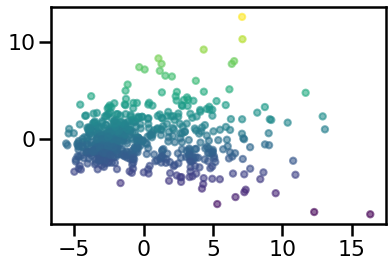

In [167]:
X_plot, Y_plot = zip(*X_pca) 

plt.scatter(X_plot, Y_plot, c=Y_plot, s=40, alpha=0.6)
plt.show()

What we can see is that we can simply assign a label to datapoints regarding their position on the first principal components. 
So the first axis is sufficient to do a quite good classification of malignant/benin cases. 

For our diagnostic, we must know which feature affect the most this first principal components. 

To quantify this influence, we need to compute the corellation between the first principal component $Z^1$ and the orignal features. 

However we know that the covariance between 2 random variables can be defined as inner product : 
$$ Cov(X,Y) = \langle X , Y \rangle $$

## Question : 
Show that $Cor(Z^1,X^j) = \frac{\alpha_{1j}}{\lambda_1}$= the jth element of the first eigenvector / the first eigen value

We know that $Cor(Z^1,X^j) = \frac{Cov(Z^1,X^j)}{\sqrt{Var(Z^1)}\sqrt{Var(X^j)}}$.

$\sqrt{Var(X^j)}$ is equal to 1 because $X$ is reduced and centered.

$\sqrt{Var(Z^1)}$ is equal to $\lambda_1$ as explained at the beginning of the notebook.

Let us look at $Cov(Z^1,X^j)$.

We have $Z^1 = A_1^TX$.

$X^j$ can be written as $XS_j^T$ where $S$ is a vector (1 x $p$) ($X$ has $p$ features) containing only zeroes, except a 1 in the j-th position. That is used to extract the j-th feature.

We thus have $Cov(Z^1,X^j) = \langle Z^1,X^j \rangle = \langle A_1^TX,XS_j^T \rangle = \langle A_1^T,S_j^T \rangle = \sum_{i=1}^p \alpha_{1,i} s_i$, where $\alpha_{1,i}$ is the i-th element of $A_1^T$ and $s_i$ is the i-th element of $S_j^T$.

As $S$ is a vector that only contains zeroes, except a 1 in the j-th position, that sum is equal to $\alpha_{1,i} s_i$ for $i=j$ and more precisely, $\alpha_{1,j} s_j = \alpha_{1,j} \times 1 = \alpha_{1,j}$.

Therefore, $Cor(Z^1,X^j) = \frac{Cov(Z^1,X^j)}{\sqrt{Var(Z^1)}\sqrt{Var(X^j)}} = \frac{\alpha_{1,j}}{\sqrt{\lambda_1}}$

### Task : Compute the corellation between Z1 and the original features 

In [168]:
corr = pca.eigenvectors[:, 0] / pca.eigenvalues[0]

print(corr)

[0.01645266 0.00779592 0.01710165 0.01660993 0.01071701 0.01798463
 0.01942132 0.01960571 0.0103846  0.00483753 0.01548132 0.00130989
 0.01588321 0.01524763 0.00109218 0.01280673 0.01154377 0.01378561
 0.00319417 0.00770901 0.01713617 0.00785189 0.01778578 0.01690122
 0.00961688 0.01579076 0.01719411 0.01885653 0.00923748 0.00990485]


### Question : Is there a feature influencing substantially the first principal component ? 

In [169]:
print(max(corr)/sum(corr))

print(sum(map(lambda x: x > 0.01, corr)))
print(sum(map(lambda x: x > 0.02, corr)))

0.05169734152976229
20
0


As it can be seen, the first principal component is an aggregate of many components of the original feature space, without any in particular being dominant of the component. Of the most prominent features, a great number of them (20 out of 30) resting in the range of 0.01-0.02, with none above 0.2. 

Likewise, even the most prominent of correlations (max(corr)) only represents 5% of the sums of the total correlation,

### Question : According to the previous question can we make a rule based on the orignal features to diagnose breast cancer ? 

We can see that there is no absolute feature that we can observe that is capable of fully diagnosing breast cancer. 

Therefore, if we want to create a rule, we need to rely on an aggregate of many different features, and still, if this aggregate is one dimensional (say, a weighted sum) it would only represent a very limited amount of the total variance of all the features (44% of total in our dataset).

While possibly an indicator for further analysis, a simple rule is not possible for a full diagnosis.

### Limitations of PCA. 

By its linear nature, PCA suffers from its inability to extract complicated structure. 

Let's see with an exemple. 

In [170]:
X = np.loadtxt('mnist2500_X.txt')
labels = np.loadtxt('mnist2500_labels.txt')

### Tasks : 
- Apply PCA to the dataset 
- Project in 2D and plot the dataset with their label

In [171]:
mypca = my_pca(reduce=False)
mypca.fit(X)
X_2D = mypca.projection(X, 2)

X_2D

array([[ 0.61344587, -1.37452188],
       [ 5.00379081, -1.94540396],
       [ 0.31463237,  2.11658407],
       ...,
       [-3.52302175, -4.1962009 ],
       [ 0.81387035,  2.43970416],
       [ 2.25717018, -3.67177791]])

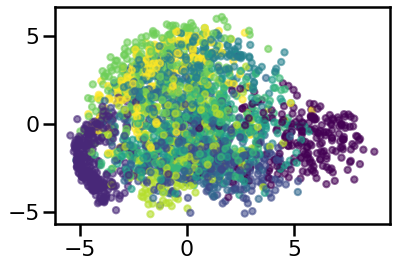

In [172]:
X_plot, Y_plot = zip(*X_2D) 

plt.scatter(X_plot, Y_plot, c=labels, s=40, alpha=0.6)
plt.show()

It's quite impossible to distinguish some clusters. Right ? 

Yes, in our limited 2D space many of the clusters are mixed in the middle, with no clear way to distinguish them from one another.

### Non linear embedding : t-sne

In order to visualize dataset accurately, we are going to project our data using non linear methods in order to decompose faithfully the dataset in order to extract the intrisec structure of the data.

Sklearn definition of tsne : t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. 




In [173]:
from sklearn.manifold import TSNE

### Tasks : 
- Apply tsne to the dataset 
- Plot the dataset with their label

In [174]:
X_2D_TNSE = TSNE(n_components=2).fit_transform(X)

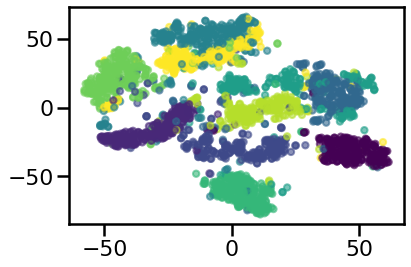

In [175]:
X_plot, Y_plot = zip(*X_2D_TNSE) 

plt.scatter(X_plot, Y_plot, c=labels, s=40, alpha=0.6)
plt.show()

As it can be seen, the TSNE separates much more clearly the different clusters of our data, and many of the different labels are clearly distinct from each other.